# Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Create Data
<h5> Generate some data with:
\begin{equation} \theta_0= 4 \end{equation} 
\begin{equation} \theta_1= 3 \end{equation} 

Add some Gaussian noise to the data

In [2]:
# Generate input values (gaussian distribtion, 100x1 vector)
X = 2 * np.random.rand(100,1)

# Generate output values and add some random noise.
# Output y = 3x + 4 and noise generated from gaussian distribution with mean 0 and standard deviation 0.5
y = 4 + 3*X + np.random.randn(100,1)*0.5

Let's plot our data to check the relation between X and Y

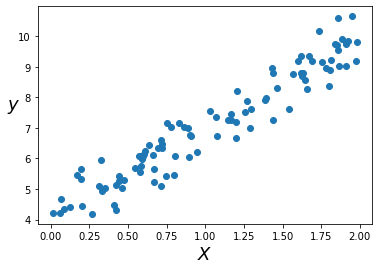

In [3]:
# Plot input and output values using scatter function from pyplot.
# Here X and y are axis of the scatter plot and will be passed to the function
plt.scatter(X,y);
# Add naming to each axis
plt.xlabel("$X$", fontsize=18);
plt.ylabel("$y$", rotation=0, fontsize=18);

##  Analytical way of Linear Regression

We have:
\begin{equation}
y^T = \begin{bmatrix} b & w \end{bmatrix} \cdotp \begin{bmatrix} 1 & X \end{bmatrix}^T
\end{equation}
So:
\begin{equation}
y^T \cdotp \begin{bmatrix} 1 & X \end{bmatrix} = \begin{bmatrix} b & w \end{bmatrix} \cdotp \begin{bmatrix} 1 & X \end{bmatrix}^T \cdotp \begin{bmatrix} 1 & X \end{bmatrix}
\end{equation}
So:
\begin{equation}
y^T \cdotp \begin{bmatrix} 1 & X \end{bmatrix} \cdotp (\begin{bmatrix} 1 & X \end{bmatrix}^T \cdotp \begin{bmatrix} 1 & X \end{bmatrix})^I = \begin{bmatrix} b & w \end{bmatrix}
\end{equation}

In [4]:
X_b = np.c_[np.ones((100,1)),X]
# theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best = y.T.dot(X_b).dot(np.linalg.inv(X_b.T.dot(X_b)))

# Print calculated [b w]
print(theta_best)

[[4.11949637 2.86834219]]


<h5>This is quite close to our real thetas 4 and 3. It cannot be accurate due to the noise I have introduced in data.

Apply our formular:
\begin{equation}
y^T = \begin{bmatrix} b & w \end{bmatrix} \cdotp \begin{bmatrix} 1 & X \end{bmatrix}^T
\end{equation}

In [5]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = theta_best.dot(X_new_b.T).T
print(y_predict)

[[4.11949637]
 [9.85618075]]


<h5>Let's plot prediction line with calculated thetas

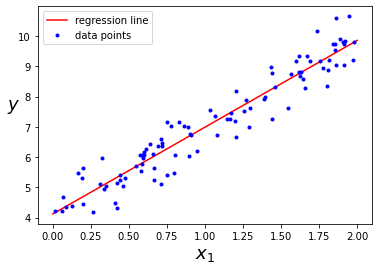

In [6]:
# plot red linear regression line ('r-')
plt.plot(X_new,y_predict,'r-', label='regression line');
# plot data points as blue dots ('b.')
plt.plot(X,y,'b.', label='data points');
# set name for each axis
plt.xlabel("$x_1$", fontsize=18);
plt.ylabel("$y$", rotation=0, fontsize=18);
# create legend on top left
plt.legend()
# show plot
plt.show()

# Gradient Descent
## Cost Function & Gradients

<h4> The equation for calculating cost function and gradients are as shown below. Please note the cost function is for Linear regression. For other algorithms the cost function will be different and the gradients would have  to be derived from the cost functions

<b>Cost</b>
\begin{equation}
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradients</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (\frac{1}{m} .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (\frac{1}{m} .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (\frac{1}{m} .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (\frac{1}{m} .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

![Gradient Descent](https://i.imgur.com/xnPvEok.gif)

In [7]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    # m as number of samples
    m = len(y)
    
    # calculate predictions
    predictions = X.dot(theta)
    
    # calculate cost using the equation above
    cost = (1/(2*m)) * np.sum(np.square(predictions-y))
    
    return cost

In [8]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    # m as number of samples
    m = len(y)
    
    # create placeholder variables for historical data (useful for plotting)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    
    # iterate through each step
    for it in range(iterations): 
        # calculate current output of each step
        prediction = np.dot(X,theta)
        # update theta using the equations above
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        # update theta and cost history
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

<h3> Let's start with 1000 iterations and a learning rate of 0.01. Start with theta from a Gaussian distribution

In [9]:
# learning rate
lr = 0.01
# number of iterations
n_iter = 2000

# initialize random thetas
theta = np.random.randn(2,1)

# create input matrix
X_b = np.c_[np.ones((len(X),1)),X]

# use gradient descent function above to optimize
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.046,
Theta1:          2.928
Final cost/MSE:  0.128


<h3> Let's plot the cost history over iterations

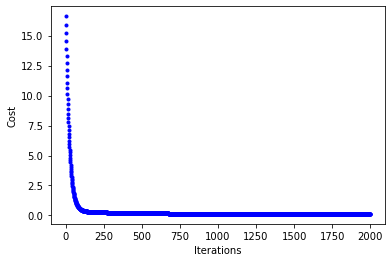

In [10]:
# plot cost values from history as blue dots ('b.')
plt.plot(range(n_iter),cost_history,'b.')
# set name for each axis
plt.ylabel('Cost')
plt.xlabel('Iterations')
# show plot
plt.show()

<h3> After around 150 iterations the cost is flat so the remaining iterations  are not needed or will not result in any further optimization. Let us zoom in till iteration 150 and see the curve

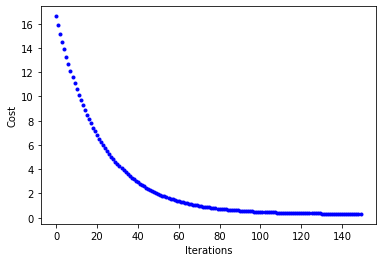

In [11]:
# plot first 150 cost values (range(150)) from history as blue dots ('b.')
plt.plot(range(150),cost_history[:150],'b.')
# set name for each axis
plt.ylabel('Cost')
plt.xlabel('Iterations')
# show plot
plt.show()

<b>It is worth while to note that the cost drops faster initially and then the gain in cost reduction is not as much
### It would be great to see the effect of different learning rates and iterations together
### Let us  build a function which can show the effects together and also show how gradient decent actually is working

In [12]:
def plot_GD(n_iter,lr,ax,ax1=None):
    """
    n_iter = no of iterations
    lr = Learning Rate
    ax = Axis to plot the Gradient Descent
    ax1 = Axis to plot cost_history vs Iterations plot

    """ 
    # plot sample points as blue dots
    _ = ax.plot(X,y,'b.')
    
    # initialize random thetas
    theta = np.random.randn(2,1)
    
    # set transparency for each step, start with 0.1
    tr =0.1
    # place holder for cost history
    cost_history = np.zeros(n_iter)
    # iterate through each step
    for i in range(n_iter):
        # calculate prediction before optimize step
        pred_prev = X_b.dot(theta)
        # optimize with GD
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        # new prediction
        pred = X_b.dot(theta)
        
        # update cost history for plotting
        cost_history[i] = h[0]
        
        # plot once every 25 steps
        if ((i % 25 == 0) ):
            # plot red linear regression line
            _ = ax.plot(X,pred,'r-')
            
            # increase transparency (for illustration)
            if tr < 0.8:
                tr = tr+0.2
    # plot cost history
    if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')  

### Plot the graphs for different iterations and learning rates combination

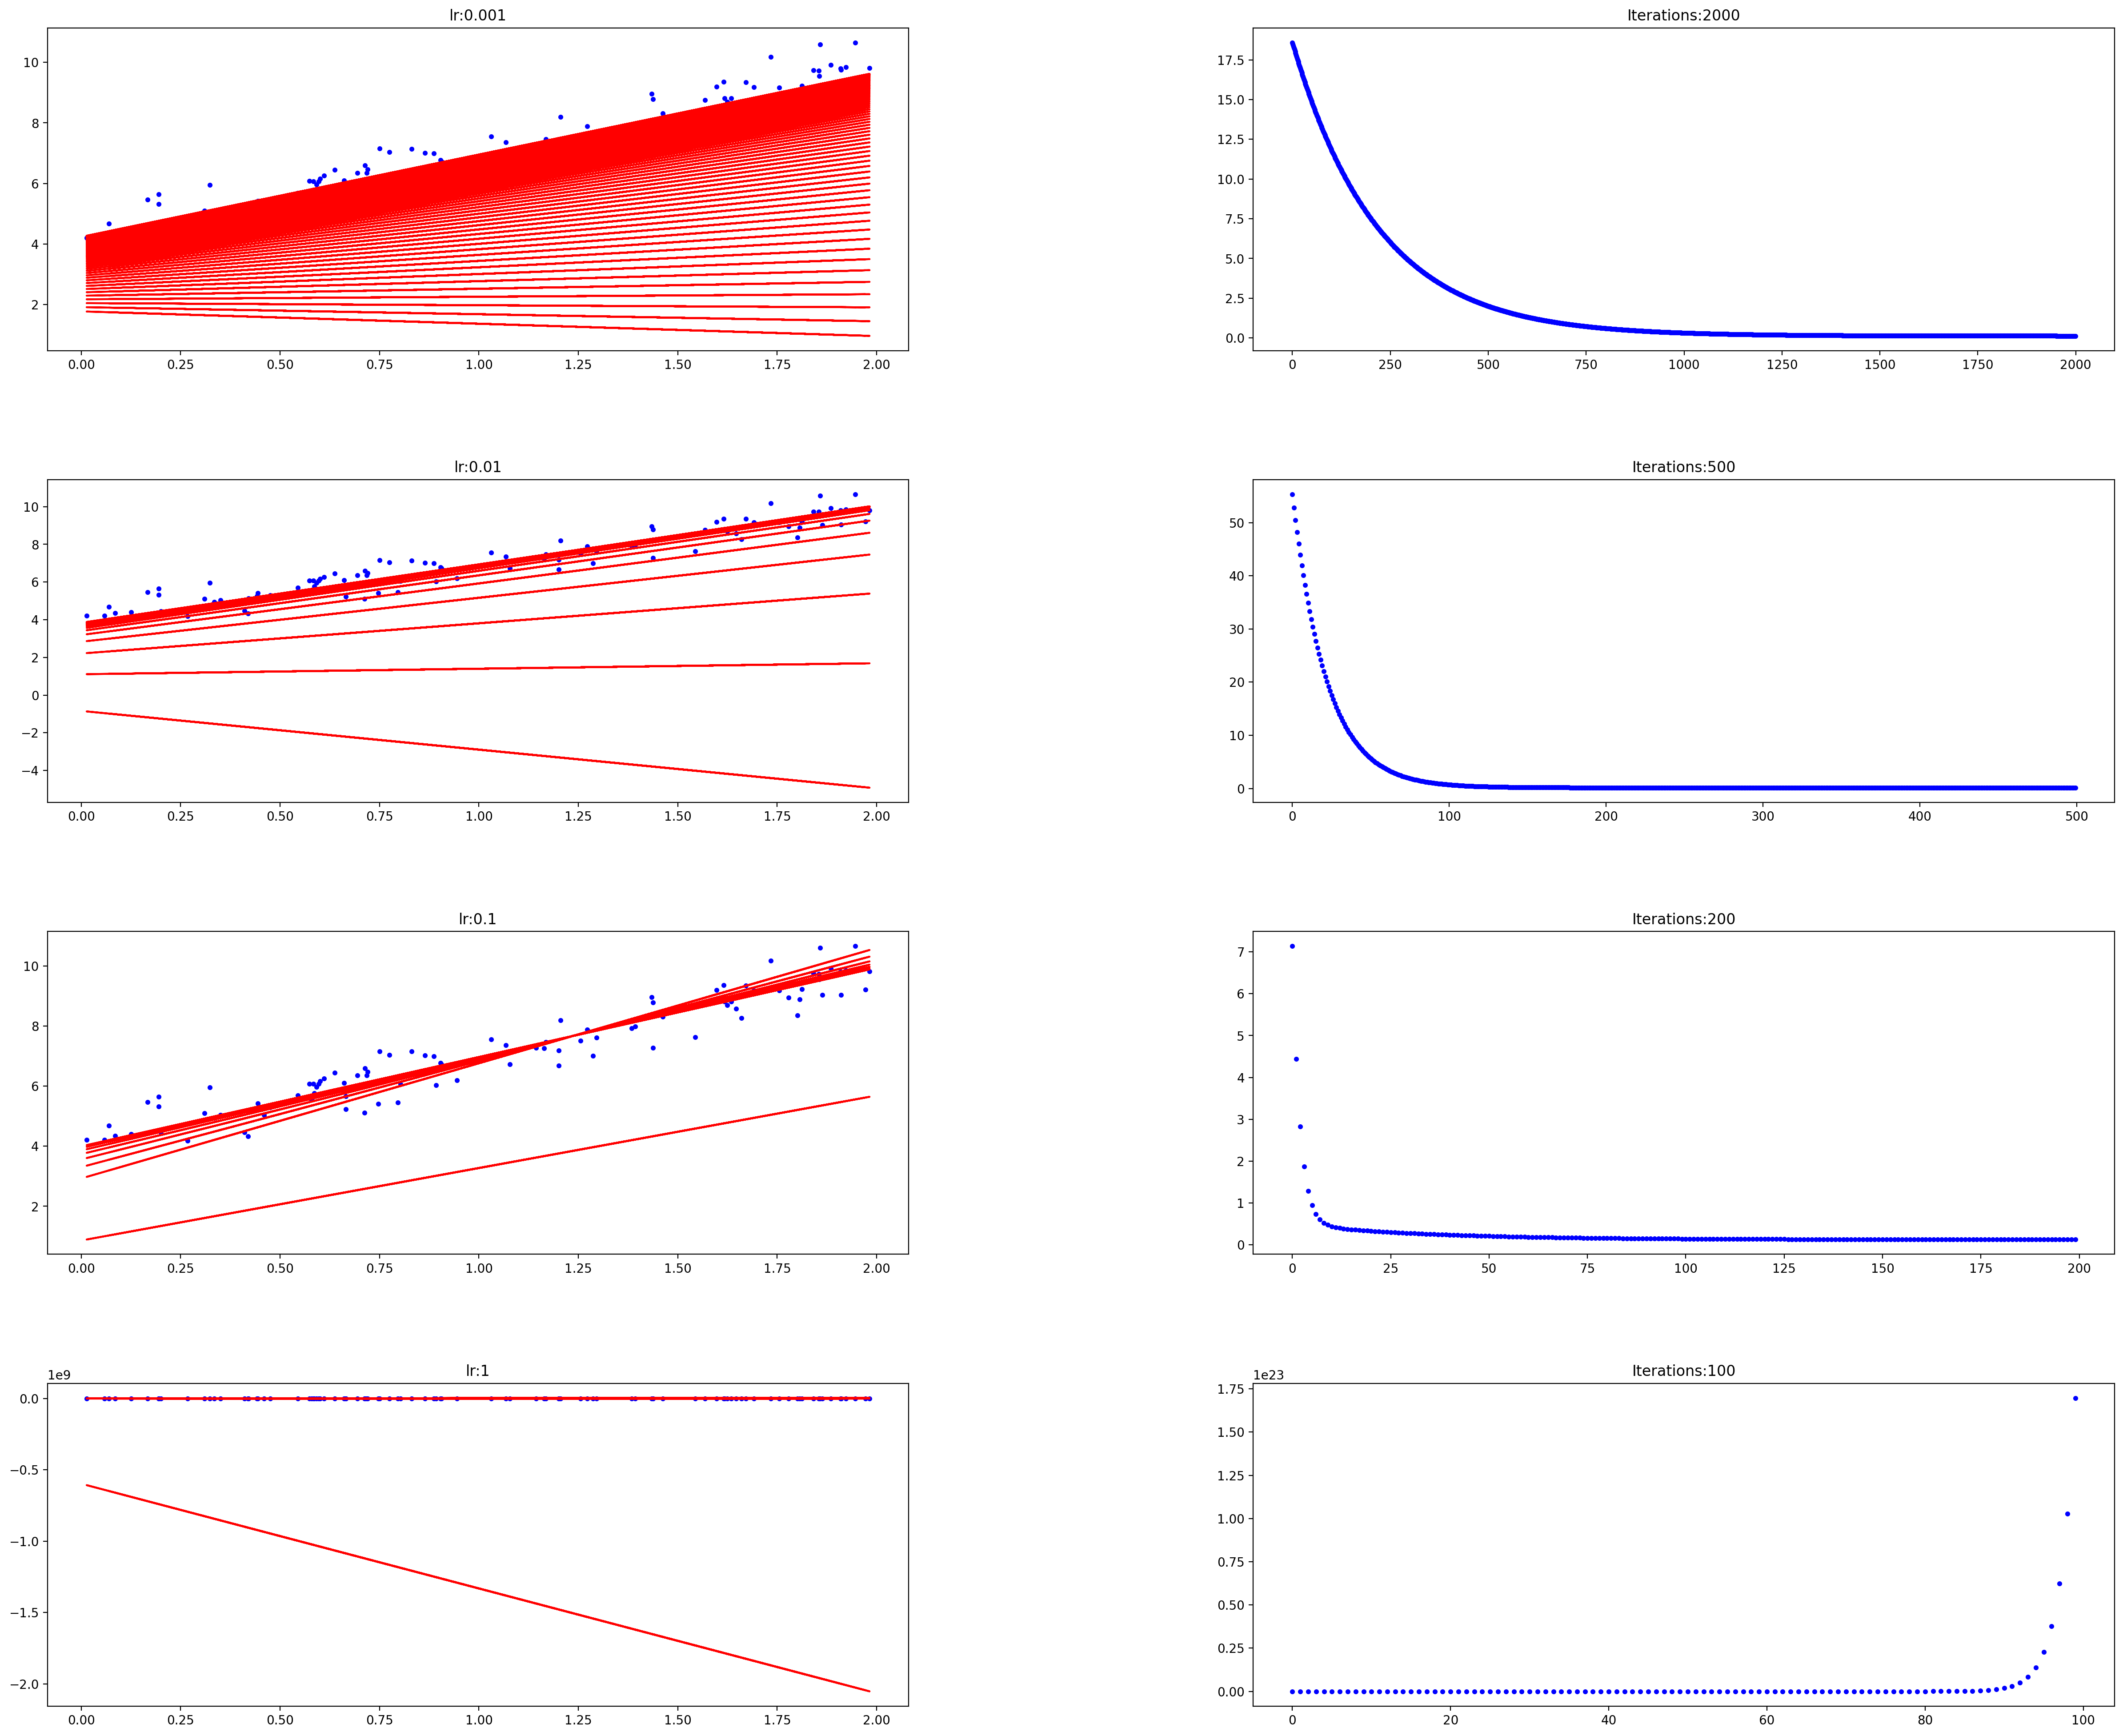

In [13]:
# create big figure size 30x25, resolution 200 dpi
fig = plt.figure(figsize=(30,25),dpi=200)
# adjust spacing for each subplot
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# create n_iter and lr pairs to try
it_lr =[(2000,0.001),(500,0.01),(200,0.1),(100,1)]

# count to subplot placement
count = 0

# iterate through pairs
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)

<b> See how useful it is to visualize the effect of learning rates and iterations on gradient descent. The red lines show how the gradient descent starts and then slowly gets closer to the final value

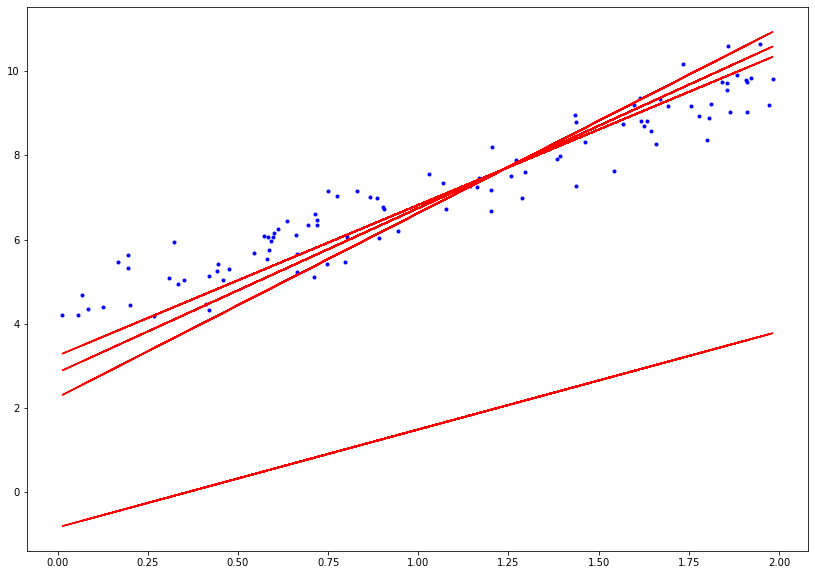

In [14]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(100,0.1,ax)

# Stochastic Gradient Descent

In [15]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [16]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.078,
Theta1:          2.917
Final cost/MSE:  12.306


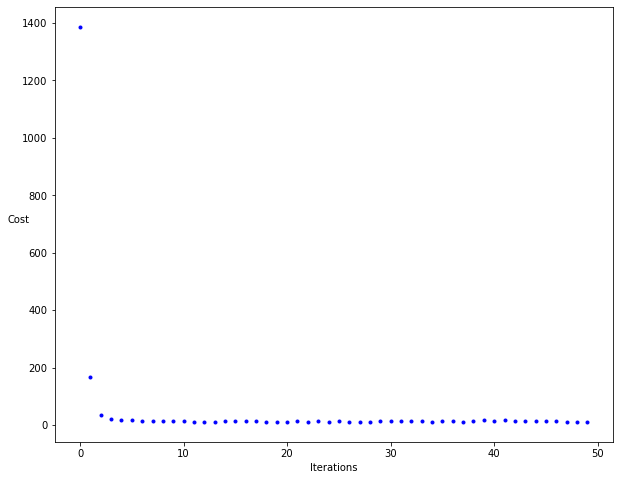

In [17]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Cost',rotation=0)
ax.set_xlabel('Iterations')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')